# **Poisonous Mushroom Prediction**

This project aims to predict whether a mushroom is poisonous or edible based on its features. We designed the solutions based on the [Binary Prediction of Poisonous Mushrooms competition](https://www.kaggle.com/competitions/playground-series-s4e8) hosted on **Kaggle**.

# **Imports and Load**

In order to run this notebook, the following libraries are required:

- Pandas
- NumPy
- MatPlotLib

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data comes from a deep learning model trained on the UCI Mushroom dataset. It is assumed that the root folder for the dataset is located in the same directory of the notebook. If the data is located in another folder, point the correct path in the `DATA_PATH` constant.

In [9]:
DATA_PATH = "data/"

train_data = pd.read_csv(DATA_PATH+"train.csv")
test_data = pd.read_csv(DATA_PATH+"test.csv")

# **Exploratory Analysis**

## First Look

Looking at the raw data, we can observe that there are some features with categorical values that will need to be encoded, in order to be fed into the ML models to learn the decision frontier. In total, the dataset have over 3 million samples we can use. It is also noticeable some lack of information in some features, having lots of NaN values present

In [10]:
display(train_data)
display(train_data.describe())

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


## Understanding the Data

The original data from the mushroom dataset and the data provided for the competition have their differences. In the data description, they inform that the data has not been cleaned up for the competition, which implies an additional cleaning process. The information present in the data can be grouped in a way to better understand what we known about a given mushroom.

**Basic Info:**
- id
- class (Target)
- does-bruise-or-bleed
- habitat
- season
- has-ring
- ring-type
- spore-print-color
- veil-type
- veil-color

**Cap Info :**
- cap-diameter
- cap-shape
- cap-surface
- cap-color

**Gill Info:**
- gill-attachment
- gill-spacing
- gill-color

**Stem Info:**
- stem-height
- stem-width
- stem-root
- stem-surface
- stem-color

## Class distribution in the dataset

Looking at the percentage of edible and poisonous mushrooms, we can see the data is balanced. Favoring a bit the edible class, but not by a large margin.

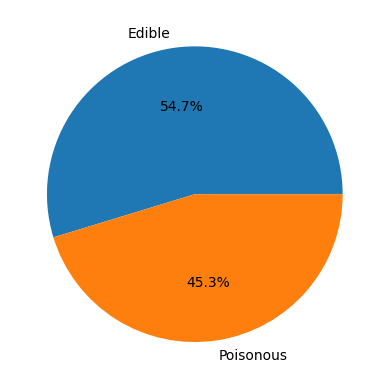

In [11]:
labels = 'Edible', 'Poisonous'
size = train_data['class'].value_counts()

fig, ax = plt.subplots()
ax.pie(size.values, labels=labels, autopct='%1.1f%%')
plt.show()

## Corruption Problem

We commented earlier that the dataset is not clean, to add the challenge of dealing with uncleaned data. Observing the possible values of a given feature, it is noticeable some sort of corruption the original data had gone through. In the column for `does-bruise-or-bleed`, it is expected true or false values in a character format. However, looking at the list of unique values in that column, we can see a lot more possible values than the true or false expected. This leads to a need of cleaning the features to mark the valid values and the unknown ones.

In [12]:
display(train_data['does-bruise-or-bleed'].unique())

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', nan, 'g', 'y',
       'r', 'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e',
       '4.42', '2.9', 'u'], dtype=object)

For that purpose we used a label encoder from the SKlearn library to encode the valid information into integers, while mapping any data not present in the values list to unknown data. The unknown values are always encoded to the number 0.

In [13]:
from sklearn.preprocessing import LabelEncoder

def nominal_encode(data, values, withUnknown=True):
    le = LabelEncoder()
    data
    le.fit(values)

    if withUnknown:
        data = data.map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.insert(le.classes_, 0, '<unknown>')

    return le.transform(data)

In [14]:
encode_list = [
    ['cap-shape', ['b','c','x','f','k','s']],
    ['cap-surface', ['f','g','y','s']],
    ['cap-color', ['n','b','c','g','r','p','u','e','w','y']],

    ['does-bruise-or-bleed', ['t','f']],
    ['has-ring',['t','f']],
    ['ring-type',['c','e','f','l','n','p','s','z']],
    ['spore-print-color',['k','n','b','h','r','o','u','w','y']], 

    ['gill-attachment', ['a','d','f','n']],
    ['gill-spacing', ['c','w','d']],
    ['gill-color', ['k','n','b','h','g','r','o','p','u','e','w','y']],

    ['stem-root',['b','c','u','e','z','?']], #stalk-root
    ['stem-surface',['f','y','k','s']], #stalk-surface
    ['stem-color',['n','b','c','g','o','p','e','w','y']], #stalk-color

    ['veil-type',['p','u']],
    ['veil-color',['n','o','w','y']],

    ['habitat',['g','l','m','p','u','w','d']],
    ['season',['a','s','u','w']]
]

train_data['class'] = nominal_encode(
        train_data['class'],
        ['e','p'],
        True
    )


for column, values in encode_list:
    train_data[column] = nominal_encode(
        train_data[column],
        values,
        True
    )

    test_data[column] = nominal_encode(
        test_data[column],
        values,
        True
    )

display(train_data)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,1,8.80,3,3,8,1,1,1,11,...,0,0,8,0,0,1,3,0,1,1
1,1,2,4.51,6,0,0,1,1,1,6,...,0,4,6,0,0,2,8,0,1,4
2,2,1,6.94,3,3,1,1,0,1,11,...,0,3,5,0,0,1,3,0,3,4
3,3,1,3.88,3,4,4,1,0,0,3,...,0,0,8,0,0,1,3,0,1,3
4,4,1,5.85,6,0,9,1,2,0,11,...,0,0,8,0,0,1,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,1,9.29,3,0,5,2,0,0,11,...,2,0,8,2,3,2,0,0,1,3
3116941,3116941,1,10.88,5,0,9,2,2,1,8,...,0,0,8,0,0,1,3,0,1,3
3116942,3116942,2,7.82,6,0,3,1,1,0,11,...,0,0,9,0,3,2,8,0,1,1
3116943,3116943,1,9.45,0,0,5,2,0,0,8,...,0,4,8,0,0,2,6,0,1,3


## Distribution of features

After the  encoding process, we can look at the distribution on each features to see how many unknown values compared to the valid ones a given feature have. This way, we can observer how much information on a given feature was lost or is missing, and decide if this feature is worth any knowledge to be fed into the model.

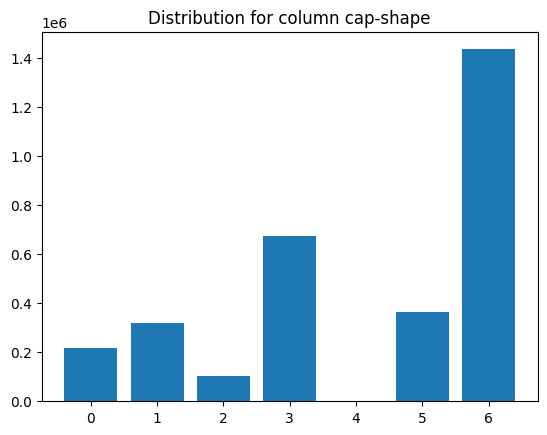

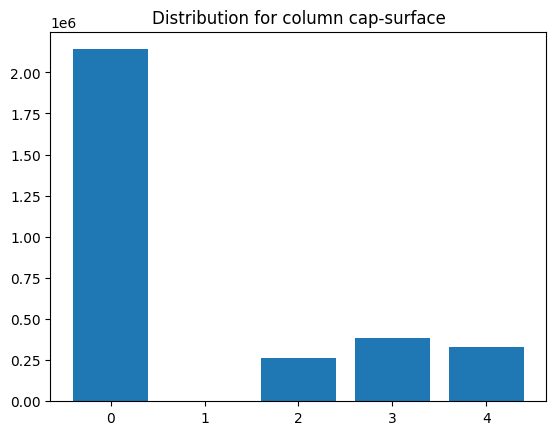

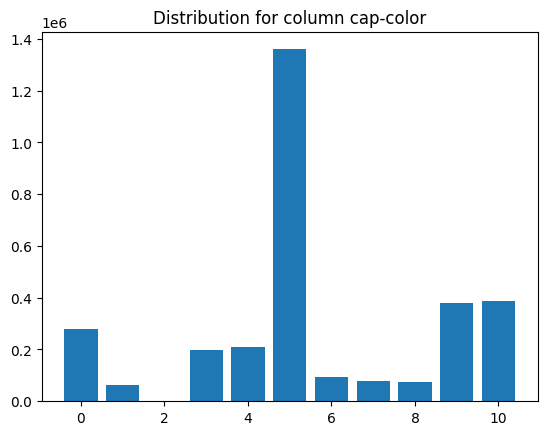

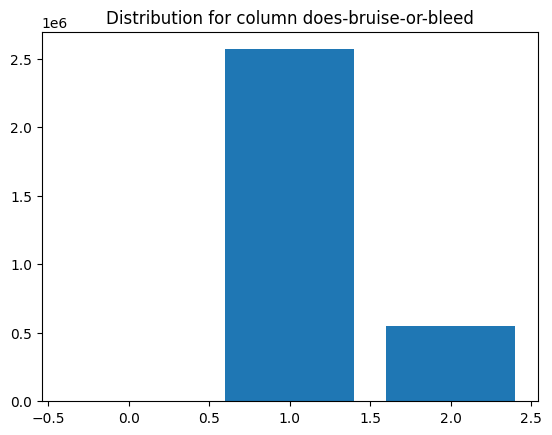

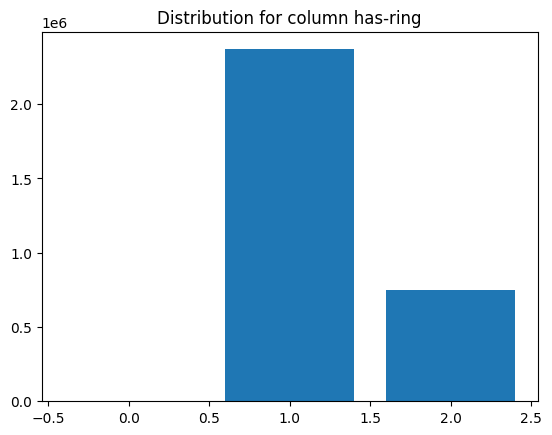

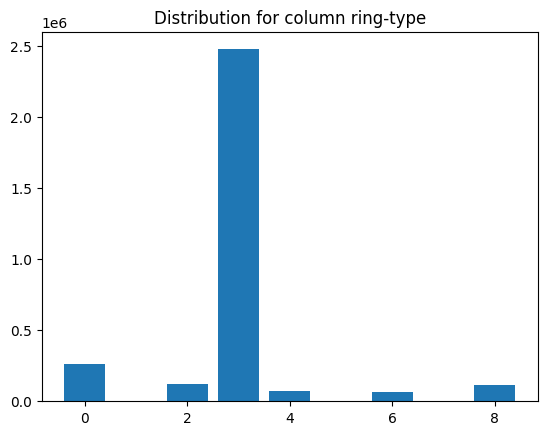

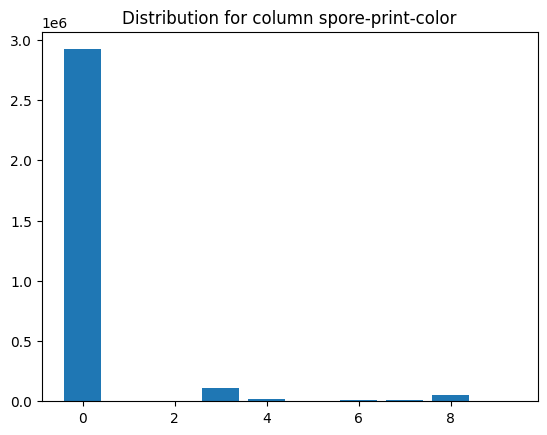

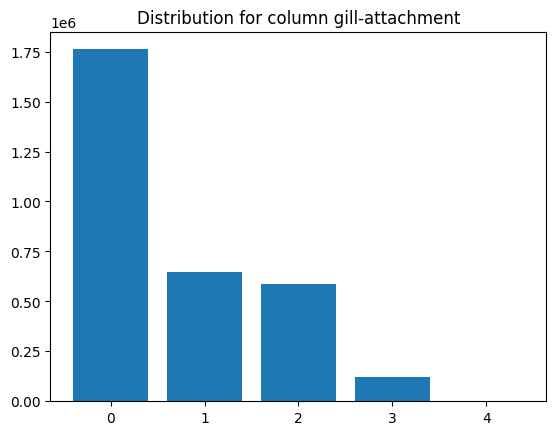

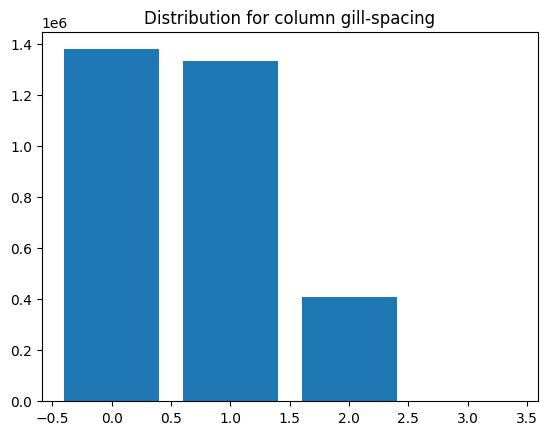

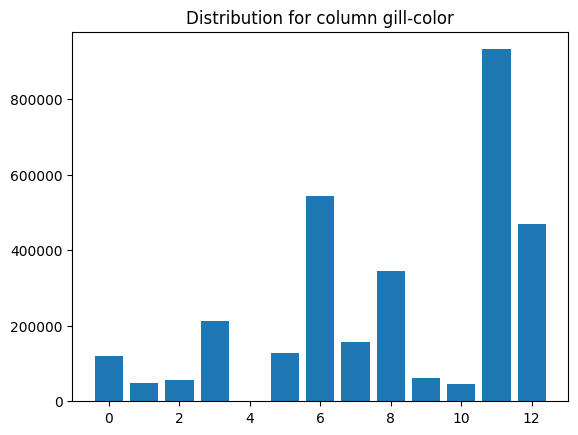

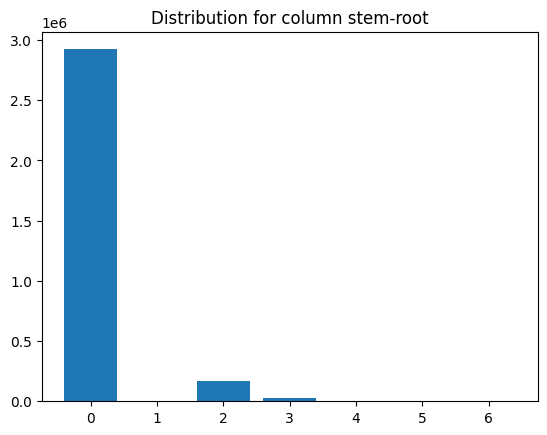

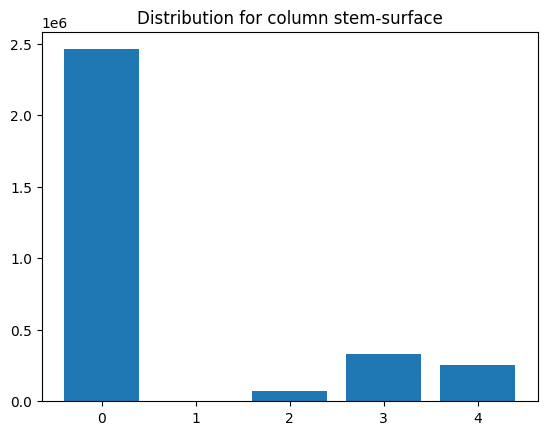

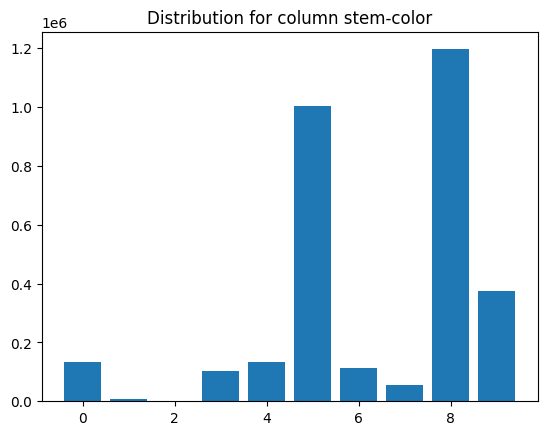

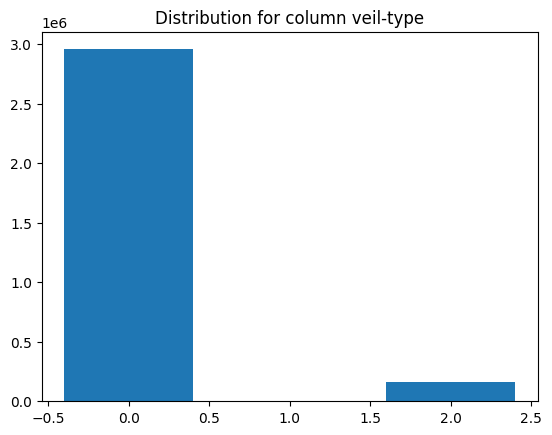

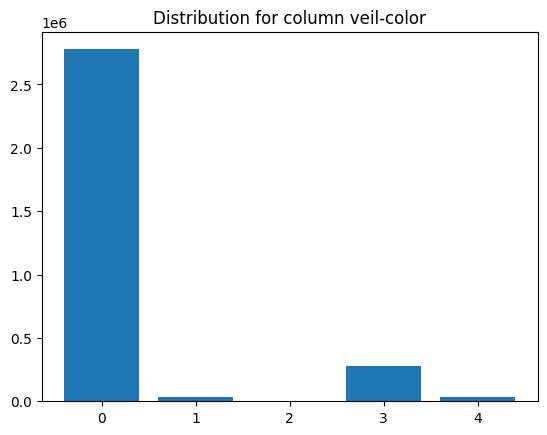

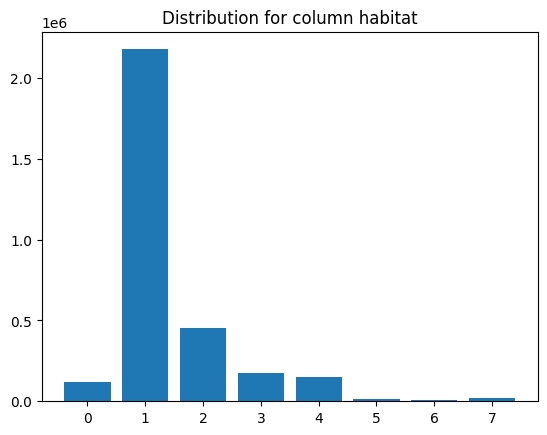

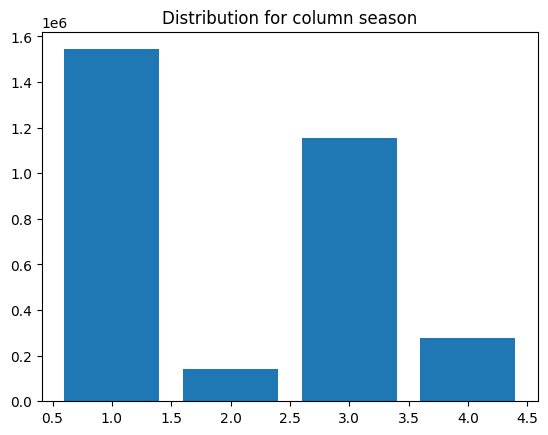

In [15]:
for column, values in encode_list:
    size = train_data[column].value_counts()

    fig, ax = plt.subplots()
    ax.bar(size.index, size.values)
    ax.set_title(f'Distribution for column {column}')
    plt.show()

The features for `gill-spacing` and `gill-attachment` presents a lot of unknown values, on a further look we analyze the distribution of values with the class label percentage related to that value. With this information, it is possible to see if the unknown values have a tendency towards a given class.

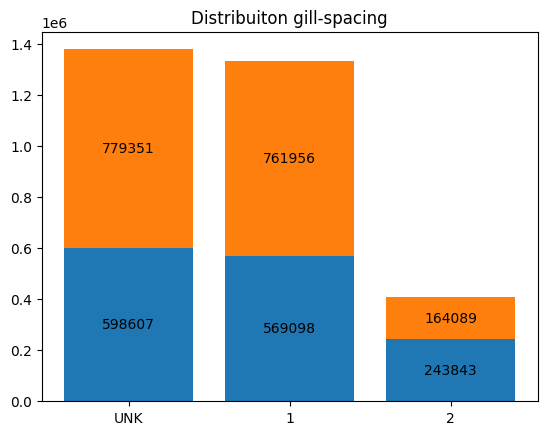

In [16]:
labels = 'Edible', 'Poisonous'
size = {
    'Edible': np.array(
        train_data[train_data['class'] == 1]['gill-spacing'].value_counts().drop(3)
    ),
    'Poisonous': np.array(
        train_data[train_data['class'] == 2]['gill-spacing'].value_counts()
    ),
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
for type, count in size.items():
    p = ax.bar(['UNK', '1', '2'], count, label=type, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')
ax.set_title(f'Distribuiton gill-spacing')
plt.show()

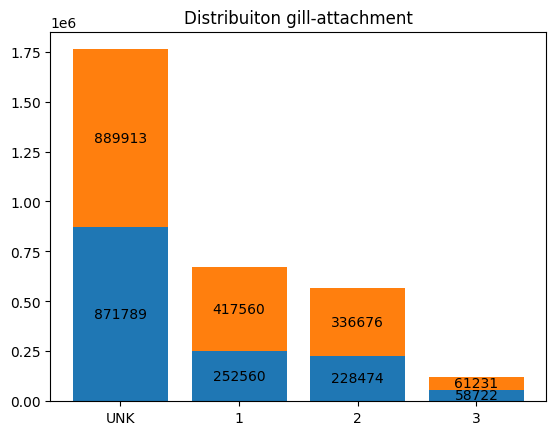

In [17]:
labels = 'Edible', 'Poisonous'
size = {
    'Edible': np.array(
        train_data[train_data['class'] == 1]['gill-attachment'].value_counts().drop(4)
    ),
    'Poisonous': np.array(
        train_data[train_data['class'] == 2]['gill-attachment'].value_counts().drop(4)
    ),
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
for type, count in size.items():
    p = ax.bar(['UNK', '1', '2', '3'], count, label=type, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')
ax.set_title(f'Distribuiton gill-attachment')
plt.show()

## Interval of Cap Diameter

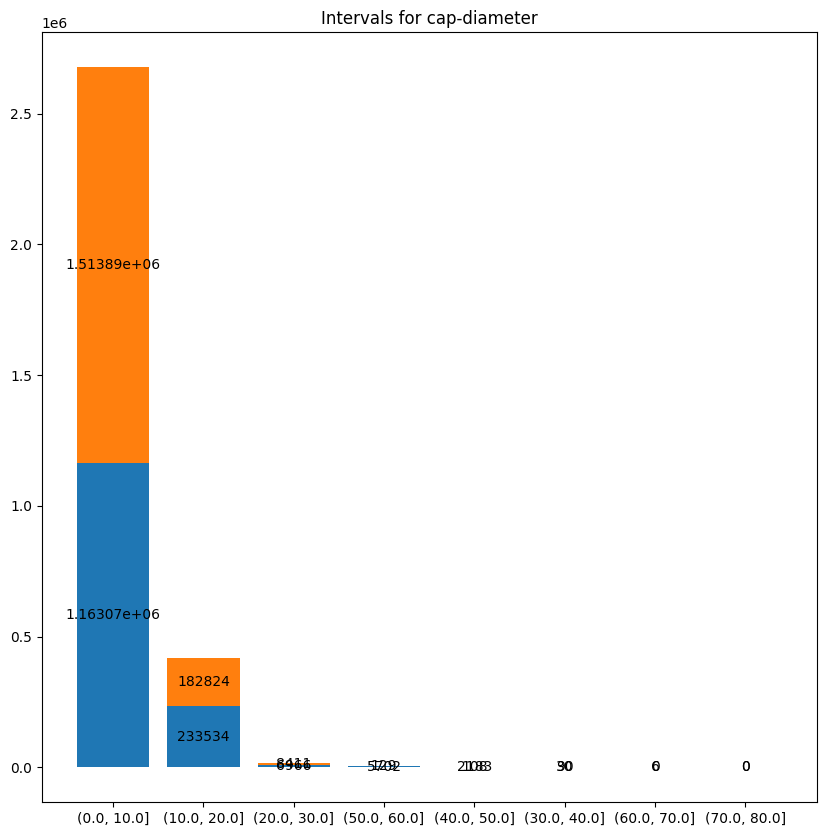

In [18]:
max_val = train_data['cap-diameter'].max()
size2 = pd.cut(train_data['cap-diameter'], np.arange(0, max_val, 10)).value_counts()

size = {
    'Edible': np.array(
        pd.cut(train_data[train_data['class'] == 1]['cap-diameter'],
                np.arange(0, max_val, 10)).value_counts()
    ),
    'Poisonous': np.array(
        pd.cut(train_data[train_data['class'] == 2]['cap-diameter'],
                np.arange(0, max_val, 10)).value_counts()
    ),
}

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
bottom = np.zeros(8)
for type, count in size.items():
    p = ax.bar(size2.index.astype(str), count, label=type, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')
ax.set_title(f'Intervals for cap-diameter')
plt.show()

## Interval of stem-height	

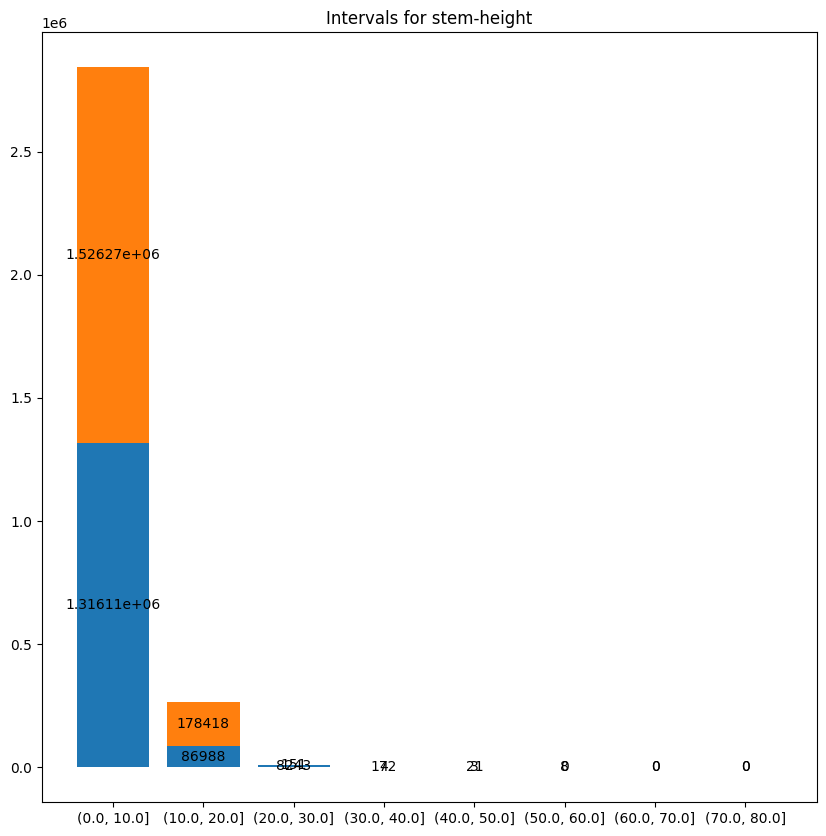

In [19]:
max_val = train_data['stem-height'].max()
size2 = pd.cut(train_data['stem-height'], np.arange(0, max_val, 10)).value_counts()

size = {
    'Edible': np.array(
        pd.cut(train_data[train_data['class'] == 1]['stem-height'],
                np.arange(0, max_val, 10)).value_counts()
    ),
    'Poisonous': np.array(
        pd.cut(train_data[train_data['class'] == 2]['stem-height'],
                np.arange(0, max_val, 10)).value_counts()
    ),
}

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
bottom = np.zeros(8)
for type, count in size.items():
    p = ax.bar(size2.index.astype(str), count, label=type, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')
ax.set_title(f'Intervals for stem-height')
plt.show()

## Interval of stem-width

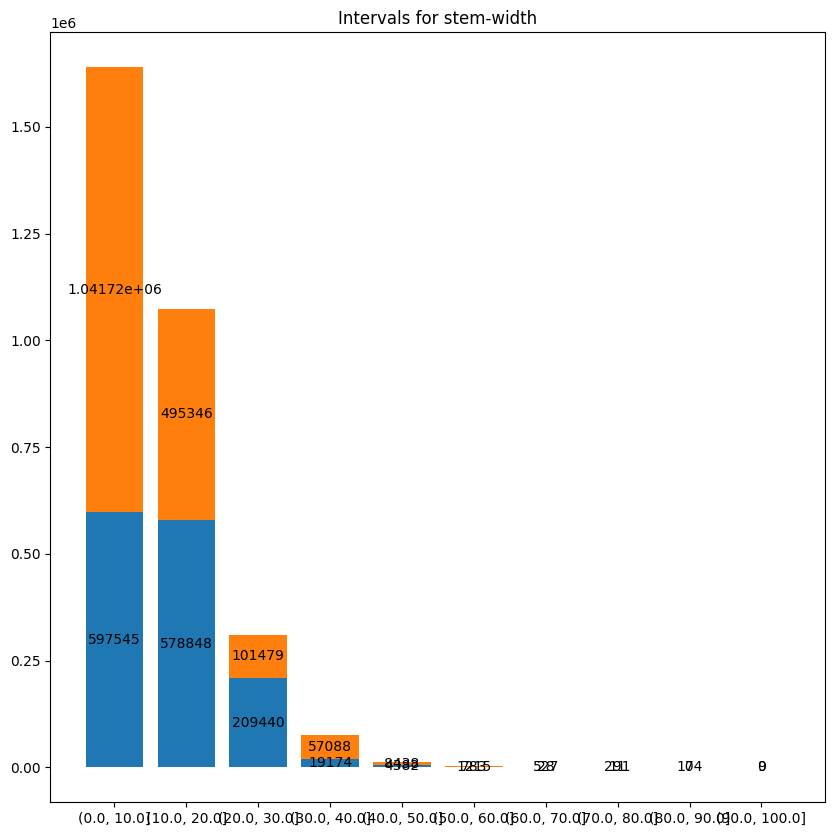

In [20]:
max_val = train_data['stem-width'].max()
size2 = pd.cut(train_data['stem-width'], np.arange(0, max_val, 10)).value_counts()

size = {
    'Edible': np.array(
        pd.cut(train_data[train_data['class'] == 1]['stem-width'],
                np.arange(0, max_val, 10)).value_counts()
    ),
    'Poisonous': np.array(
        pd.cut(train_data[train_data['class'] == 2]['stem-width'],
                np.arange(0, max_val, 10)).value_counts()
    ),
}

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
bottom = np.zeros(10)
for type, count in size.items():
    p = ax.bar(size2.index.astype(str), count, label=type, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')
ax.set_title(f'Intervals for stem-width')
plt.show()

## Drop List

After this analysis we decided to drop some features of the dataset for the low information value they can bring to the decision model.

- cap-surface
- gill-spacing
- gill-attachment
- veil-type
- veil-color
- stem-root
- stem-surface

In [21]:
drop_list = ['id',
            'cap-surface',
            'spore-print-color',
            'veil-type',
            'veil-color',
            'gill-spacing',
            'gill-attachment',
            'stem-root',
            'stem-surface']

train_data.drop(columns=drop_list,inplace=True)
train_data.dropna(inplace=True)

test_data.drop(columns=drop_list, inplace=True)

display(train_data)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,8.80,3,8,1,11,4.51,15.39,8,1,3,1,1
1,2,4.51,6,0,1,6,4.79,6.48,6,2,8,1,4
2,1,6.94,3,1,1,11,6.85,9.93,5,1,3,3,4
3,1,3.88,3,4,1,3,4.16,6.53,8,1,3,1,3
4,1,5.85,6,9,1,11,3.37,8.36,8,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,1,9.29,3,5,2,11,12.14,18.81,8,2,0,1,3
3116941,1,10.88,5,9,2,8,6.65,26.97,8,1,3,1,3
3116942,2,7.82,6,3,1,11,9.51,11.06,9,2,8,1,1
3116943,1,9.45,0,5,2,8,9.13,17.77,8,2,6,1,3


# **Training a Classifier**

After the exploratory analysis and cleaning process, the data is ready to train an ML model to predict wether a mushroom is poisonous or edible. For this, we choose a Stochastic Gradient Descent classifier with random initial weights, limiting its runtime to 5000 epochs.

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(
    train_data.loc[:, train_data.columns != 'class'], 
    train_data['class'], 
    test_size=0.25, 
    random_state=12)

clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=5000, tol=1e-3))

clf.fit(X_train,y_train)

print(f"VALIDATION ACC: {100*clf.score(X_test, y_test):.2f}%")

VALIDATION ACC: 64.96%
